In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler


In [2]:
# train_df = pd.read_csv("data/dynamic_labeled_train.csv")
# val_df = pd.read_csv("data/dynamic_labeled_dev.csv")
# test_df = pd.read_csv("data/dynamic_labeled_test.csv")


# Preprocessing And Visualization

In [ ]:
# print(train_df.describe())
# print(train_df.info())
# print(train_df.columns)

## Data Cleaning & Preprocessing

### 1. Convert Datetime

In [4]:
# def convert_datetime(df):
#     # Chuyển đổi cột 'Date' sang kiểu datetime
#     df['Date'] = pd.to_datetime(df['Date'])
#     # Sắp xếp lại dữ liệu theo thời gian để đảm bảo tính tuần tự
#     df = df.sort_values(by='Date').reset_index(drop=True)
#     # Đặt 'Date' làm chỉ mục (index) của DataFrame để thuận tiện cho việc slicing và plotting
#     df.set_index('Date', inplace=True)

### 2. Encode target label

In [5]:
# def encode_label(df):
#     # Kiểm tra các giá trị duy nhất trong cột 'Label'
#     print(df['Label'].value_counts())
#     # Gán nhãn theo quy ước: hold:0, buy:1, sell:2
#     label_map = {'HOLD': 0, 'BUY': 1, 'SELL': 2}
#     df['Label_encoded'] = df['Label'].map(label_map)
#     return df

### 3. Check duplicate data

In [6]:
# def check_duplicate(df):
#     duplicate_rows = df.duplicated().sum()
#     print(f"Số lượng dòng dữ liệu trùng lặp: {duplicate_rows}")

#     # Nếu có, xóa chúng đi
#     if duplicate_rows > 0:
#         train_df.drop_duplicates(inplace=True)

### 4. Data Cleaning Pipeline

In [7]:
# def data_cleaning_pipeline(df):
#     convert_datetime(df)
#     encode_label(df)
#     check_duplicate(df)
#     return df

## Exploratory Data Analysis

### 1. Visualize Trend Over Time

In [8]:
# def visualize_trend_over_time(df):
#     plt.figure(figsize=(15, 7))
#     # Không thay đổi cột 'Date', chỉ dùng bản tạm thời cho việc vẽ nếu cần
#     date_col = df['Date']
#     if not pd.api.types.is_datetime64_any_dtype(date_col):
#         date_col = pd.to_datetime(date_col)
#     plt.plot(date_col, df['Close'], label='Giá đóng cửa (Close Price)')
#     plt.title('Xu hướng giá đóng cửa theo thời gian')
#     plt.xlabel('Ngày')
#     plt.ylabel('Giá')
#     plt.legend()
#     plt.grid(True)
#     plt.gcf().autofmt_xdate()  # Tự động format trục x cho đẹp
#     plt.show()

### 2. Analyze Volume

In [9]:
# def analyze_volume(df):
#     monthly_volume = df.resample('M', on='Date')['Volume'].sum()
#     plt.figure(figsize=(15, 7))
#     plt.bar(monthly_volume.index, monthly_volume.values, width=20, color='gray')
#     plt.title('Khối lượng giao dịch theo tháng')
#     plt.xlabel('Tháng')
#     plt.ylabel('Khối lượng')
#     plt.gcf().autofmt_xdate()
#     plt.show()

### 3. Analyze Label Distribution

In [10]:
# def analyze_label_distribution(df):
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x='Label', data=df)
#     plt.title('Phân bổ các nhãn')
#     plt.show()

### 4. Corelation Matrix


In [11]:
# def analyze_correlation_matrix(df):
#     # Chỉ chọn các cột số để tính tương quan
#     numeric_cols = df.select_dtypes(include=['float64', 'int64'])
#     correlation_matrix = numeric_cols.corr()

#     plt.figure(figsize=(10, 8))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#     plt.title('Ma trận tương quan giữa các đặc trưng')
#     plt.show()

### 5. EDA Pipeline

In [12]:
# def eda_pipeline(df):
#     visualize_trend_over_time(df)
#     analyze_volume(df)
#     analyze_label_distribution(df)
#     analyze_correlation_matrix(df)
#     return df

## Feature Engineering

In [13]:
# from ta import add_all_ta_features

# def add_technical_indicators(df):
#     """
#     Hàm để thêm tất cả các chỉ báo kỹ thuật từ thư viện 'ta' vào DataFrame.
#     DataFrame đầu vào phải có các cột: 'Open', 'High', 'Low', 'Close', 'Volume'.
#     """
#     # Đảm bảo các cột OHLCV có kiểu dữ liệu số
#     for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
#         if col in df.columns:
#             df[col] = pd.to_numeric(df[col], errors='coerce')
#         else:
#             raise ValueError(f"Cột '{col}' không tồn tại trong DataFrame.")

#     print(f"Thêm các chỉ báo TA vào DataFrame có shape: {df.shape}")

#     # Lưu lại tên cột gốc để khôi phục sau.
#     original_columns = df.columns.tolist()
#     df.columns = [col.lower() for col in df.columns]

#     # Thêm tất cả các chỉ báo.
#     # `fillna=True` sẽ tự động điền các giá trị NaN bằng ffill.
#     df_with_ta = add_all_ta_features(
#         df, open="open", high="high", low="low", close="close", volume="volume", fillna=True
#     )

#     # Không cần đổi về chữ hoa nữa, giữ nguyên tên cột như sau khi thêm chỉ báo
#     # Nếu muốn khôi phục tên cột gốc cho các cột ban đầu, có thể làm như sau:
#     for col in original_columns:
#         col_lower = col.lower()
#         if col_lower not in df_with_ta.columns and col_lower in df.columns:
#             df_with_ta[col_lower] = df[col_lower]

#     # Xử lý các giá trị vô cực (inf) có thể xuất hiện do chia cho 0
#     df_with_ta.replace([np.inf, -np.inf], np.nan, inplace=True)
#     # Điền nốt các giá trị NaN còn sót lại
#     df_with_ta.fillna(method='bfill', inplace=True)
#     df_with_ta.fillna(method='ffill', inplace=True)

#     print(f"Shape mới sau khi thêm chỉ báo TA: {df_with_ta.shape}")
#     return df_with_ta

## Preprocessing Pipeline

In [14]:
# def preprocessing_pipeline(df):
#     data_cleaning_pipeline(df)
#     eda_pipeline(df)
#     add_technical_indicators(df)
#     return df

In [ ]:
# train_df = preprocessing_pipeline(train_df)

In [ ]:
# val_df = preprocessing_pipeline(val_df)

In [ ]:
# test_df = preprocessing_pipeline(test_df)

# Start Here

In [22]:
import pandas as pd

train_df = pd.read_csv("data/full_train_data.csv")
val_df = pd.read_csv("data/full_val_data.csv")
test_df = pd.read_csv("data/full_test_data.csv")

# Backtest

In [25]:
import numpy as np

## 1. Fixed Allocation Backtest

In [33]:
def run_event_driven_backtest(price_series, signals):
    """
    Chạy backtest vector hóa dựa trên chuỗi giá và tín hiệu.
    Tránh được lookahead bias bằng cách sử dụng .shift(1) cho vị thế.
    """
    backtest_df = pd.DataFrame({'price': price_series, 'signal': signals})
    backtest_df['asset_log_returns'] = np.log(backtest_df['price'] / backtest_df['price'].shift(1))
    
    # Sử dụng ffill() thay cho replace(..., method='ffill') để tránh FutureWarning
    backtest_df['position'] = backtest_df['signal'].replace(0, np.nan).ffill().shift(1)
    backtest_df['strategy_log_returns'] = backtest_df['asset_log_returns'] * backtest_df['position']
    
    # Tạo đường cong vốn (equity curve)
    backtest_df['cumulative_asset_returns'] = backtest_df['asset_log_returns'].cumsum().apply(np.exp)
    backtest_df['cumulative_strategy_returns'] = backtest_df['strategy_log_returns'].cumsum().apply(np.exp)
    
    return backtest_df.dropna()

## 2. Event - Driven Backtest


In [27]:
def run_event_driven_backtest(price_series, signals, barriers_df):
    """Hàm backtest dựa trên sự kiện (giữ nguyên)."""
    returns_list = []
    in_position = False
    position_type = 0
    entry_price = 0
    current_pt, current_sl, current_vb = np.inf, 0, pd.Timestamp.max
    trades = []
    
    for timestamp, price in price_series.items():
        daily_return = 0
        if in_position:
            exit_reason = None
            if position_type == 1 and price <= current_sl:
                exit_reason = "Stop-Loss"
            elif position_type == 1 and price >= current_pt:
                exit_reason = "Profit-Take"
            elif pd.notna(current_vb) and timestamp >= current_vb:
                exit_reason = "Time-Out"
            
            if exit_reason:
                trade_return = (price / entry_price - 1) * position_type
                trades.append(trade_return)
                daily_return = trade_return
                in_position = False
            else:
                prev_price = price_series.loc[:timestamp].iloc[-2]
                daily_return = (price / prev_price - 1) * position_type
            returns_list.append(daily_return)
        else:
            signal = signals.loc[timestamp] if timestamp in signals.index else 0
            if signal in [1, -1]:
                in_position = True
                position_type = signal
                entry_price = price
                current_pt = barriers_df.loc[timestamp, 'pt_level']
                current_sl = barriers_df.loc[timestamp, 'sl_level']
                current_vb = barriers_df.loc[timestamp, 'vb_timestamp']
            returns_list.append(0)
            
    trade_metrics = {}
    if trades:
        trade_returns = pd.Series(trades)
        win_rate = (trade_returns > 0).sum() / len(trade_returns) if len(trade_returns) > 0 else 0
        profit_factor = trade_returns[trade_returns > 0].sum() / abs(trade_returns[trade_returns < 0].sum()) if abs(trade_returns[trade_returns < 0].sum()) > 0 else np.inf
        trade_metrics = {"Number of Trades": len(trades), "Win Rate": f"{win_rate:.2%}", "Profit Factor": f"{profit_factor:.2f}"}
        
    return pd.Series(returns_list, index=price_series.index), trade_metrics

# Triple Barrier Labeling

In [20]:
import numba  # Thư viện để tăng tốc độ cho code Python

@numba.njit
def _calculate_atr_numba(high, low, close, n=14):
    """
    Hàm nội bộ để tính ATR bằng Wilder's smoothing.
    """
    tr = np.zeros_like(high)
    for i in range(1, len(high)):
        tr[i] = np.max(np.array([
            high[i] - low[i],
            np.abs(high[i] - close[i-1]),
            np.abs(low[i] - close[i-1])
        ]))
    
    atr = np.zeros_like(high)
    atr[n-1] = np.mean(tr[0:n])  # First ATR is a simple average
    for i in range(n, len(high)):
        atr[i] = (atr[i-1] * (n-1) + tr[i]) / n
        
    return atr

@numba.njit
def _find_barrier_hits_numba(prices, pt_levels, sl_levels, time_limit):
    """
    Hàm numba để lặp qua các rào cản và trả về nhãn cùng thời điểm chạm.
    
    Returns:
        tuple(np.array, np.array): (labels, hit_indices)
    """
    n = len(prices)
    labels = np.zeros(n, dtype=np.int8)       # 0: Time-out, 1: Profit-Take, -1: Stop-Loss
    hit_indices = np.full(n, -1, dtype=np.int64) # Lưu vị trí index khi chạm rào cản

    for i in range(n):
        # Bỏ qua nếu các mức rào cản không hợp lệ
        if np.isnan(pt_levels[i]) or np.isnan(sl_levels[i]):
            continue
            
        # Vòng lặp tìm kiếm trong tương lai
        for j in range(1, time_limit + 1):
            if i + j >= n:
                break  # Đã đi hết mảng giá
            
            future_price = prices[i + j]
            
            # Kiểm tra chạm rào cản trên (Profit-Take)
            if future_price >= pt_levels[i]:
                labels[i] = 1
                hit_indices[i] = i + j
                break  # Thoát vòng lặp khi đã tìm thấy điểm chạm
            
            # Kiểm tra chạm rào cản dưới (Stop-Loss)
            elif future_price <= sl_levels[i]:
                labels[i] = -1
                hit_indices[i] = i + j
                break  # Thoát vòng lặp khi đã tìm thấy điểm chạm
        
        # Nếu không chạm rào cản nào, gán sự kiện hết hạn (time-out)
        if labels[i] == 0:
            # Lấy vị trí cuối cùng trong cửa sổ thời gian
            end_idx = min(i + time_limit, n - 1)
            hit_indices[i] = end_idx

    return labels, hit_indices


def apply_atr_triple_barrier_df(df, profit_take_factor=2.0, stop_loss_factor=1.5, time_limit=12, atr_period=14):
    """
    Áp dụng Triple Barrier trên DataFrame, trả về DataFrame mới với các cột:
    - pt_level: mức giá chốt lời (upper barrier)
    - sl_level: mức giá cắt lỗ (lower barrier)
    - vb_timestamp: timestamp thời điểm chạm barrier hoặc hết time_limit
    - label: nhãn kết quả (-1, 0, 1)
    """
    # 1. Chuẩn bị dữ liệu dạng numpy array
    high = df['high'].values
    low = df['low'].values
    close = df['close'].values

    # 2. Tính toán ATR và các mức rào cản
    atr_values = _calculate_atr_numba(high, low, close, n=atr_period)
    pt_level = close + (profit_take_factor * atr_values)
    sl_level = close - (stop_loss_factor * atr_values)

    # 3. Gọi hàm numba để tìm kiếm và gán nhãn
    labels, hit_indices = _find_barrier_hits_numba(close, pt_level, sl_level, time_limit)

    # 4. Tạo DataFrame kết quả và gán các cột
    result_df = df.copy()
    result_df['pt_level'] = pt_level
    result_df['sl_level'] = sl_level
    result_df['label'] = labels

    # Gán vb_timestamp một cách chính xác
    # Sử dụng object dtype cho mảng timestamp để tránh lỗi với pd.NaT
    default_timestamps = np.full(len(df.index), pd.NaT, dtype=object)
    # Lấy ra các index hợp lệ
    valid_indices_mask = hit_indices != -1
    valid_hit_indices = hit_indices[valid_indices_mask]
    # Gán timestamp dựa trên vị trí index
    # Đảm bảo df.index là kiểu DatetimeIndex hoặc có thể lấy giá trị timestamp
    if isinstance(df.index, (pd.DatetimeIndex, pd.Index)):
        index_values = df.index.values
    else:
        index_values = np.array(df.index)
    default_timestamps[valid_indices_mask] = index_values[valid_hit_indices]
    result_df['vb_timestamp'] = default_timestamps

    return result_df

PROFIT_TAKE_FACTOR = 2.5
STOP_LOSS_FACTOR = 1.5
TIME_LIMIT = 12
ATR_PERIOD = 24

TBA_ARGS = {
    'profit_take_factor': PROFIT_TAKE_FACTOR,
    'stop_loss_factor': STOP_LOSS_FACTOR,
    'time_limit': TIME_LIMIT,
    'atr_period': ATR_PERIOD
}

train_df = apply_atr_triple_barrier_df(train_df, **TBA_ARGS)
val_df = apply_atr_triple_barrier_df(val_df, **TBA_ARGS)
test_df = apply_atr_triple_barrier_df(test_df, **TBA_ARGS)

Profit Take Factor: 100%|██████████| 20/20 [01:58<00:00,  5.91s/it]


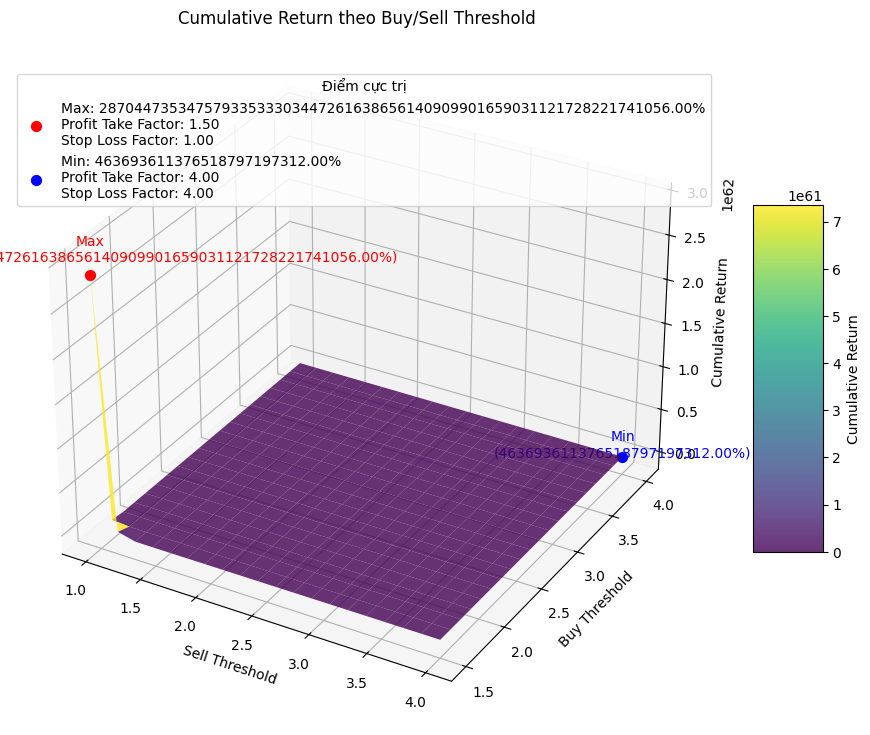

In [34]:
import matplotlib.pyplot as plt

def maximize_cum_return_in_sl_pt_threshold_grid(results_df):
    profit_take_factors = np.linspace(1.5, 4, 20)
    stop_loss_factors = np.linspace(1.0, 4, 20)
    Z = np.zeros((len(profit_take_factors), len(stop_loss_factors)))

    from tqdm import tqdm

    # Vòng lặp tính toán với tqdm progress bar
    for i, profit_take_factor in enumerate(tqdm(profit_take_factors, desc="Profit Take Factor")):
        for j, stop_loss_factor in enumerate(tqdm(stop_loss_factors, desc="Stop Loss Factor", leave=False)):
            TBA_ARGS = {
                'profit_take_factor': profit_take_factor,
                'stop_loss_factor': stop_loss_factor,
                'time_limit': TIME_LIMIT,
                'atr_period': ATR_PERIOD
            }
            df = apply_atr_triple_barrier_df(train_df, **TBA_ARGS)

            signals = df['label']

            results_df['signal'] = signals
            backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
            strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
            equity_curve = (1 + strategy_returns_series).cumprod()
            total_return = equity_curve.iloc[-1] - 1
            Z[i, j] = float(total_return) / 100
            

    # Tìm cực đại & cực tiểu
    max_idx = np.unravel_index(np.argmax(Z), Z.shape)
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)
    max_val = Z[max_idx]
    min_val = Z[min_idx]

    max_profit_take_factor = profit_take_factors[max_idx[0]]
    max_stop_loss_factor = stop_loss_factors[max_idx[1]]
    min_profit_take_factor = profit_take_factors[min_idx[0]]
    min_stop_loss_factor = stop_loss_factors[min_idx[1]]

    X, Y = np.meshgrid(stop_loss_factors, profit_take_factors)

    # --- Vẽ 3D surface với chú thích tọa độ ---
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # Giảm alpha để dễ nhìn text hơn

    # --- ĐÁNH DẤU CỰC ĐẠI VÀ IN TỌA ĐỘ ---
    # Chú thích được cập nhật để bao gồm tọa độ (buy, sell)
    max_label = (f'Max: {max_val:.2%}\n'
                 f'Profit Take Factor: {max_profit_take_factor:.2f}\n'
                 f'Stop Loss Factor: {max_stop_loss_factor:.2f}')
    ax.scatter(max_stop_loss_factor, max_profit_take_factor, max_val, color='red', s=50, label=max_label)
    ax.text(max_stop_loss_factor, max_profit_take_factor, max_val * 1.05, f'Max\n({max_val:.2%})', color='red', fontsize=10, ha='center')

    # --- ĐÁNH DẤU CỰC TIỂU VÀ IN TỌA ĐỘ ---
    # Chú thích được cập nhật để bao gồm tọa độ (buy, sell)
    min_label = (f'Min: {min_val:.2%}\n'
                 f'Profit Take Factor: {min_profit_take_factor:.2f}\n'
                 f'Stop Loss Factor: {min_stop_loss_factor:.2f}')
    ax.scatter(min_stop_loss_factor, min_profit_take_factor, min_val, color='blue', s=50, label=min_label)
    ax.text(min_stop_loss_factor, min_profit_take_factor, min_val * 0.95, f'Min\n({min_val:.2%})', color='blue', fontsize=10, ha='center')

    ax.set_xlabel('Sell Threshold')
    ax.set_ylabel('Buy Threshold')
    ax.set_zlabel('Cumulative Return')
    ax.set_title('Cumulative Return theo Buy/Sell Threshold')
    
    # Hiển thị chú thích (legend) với thông tin tọa độ
    ax.legend(title="Điểm cực trị", loc='upper left', bbox_to_anchor=(0.0, 0.95))
    
    fig.colorbar(surf, shrink=0.5, aspect=5, label='Cumulative Return')
    plt.show()

maximize_cum_return_in_sl_pt_threshold_grid(train_df)

In [ ]:
import pywt

def apply_wavelet_transform(data, columns, wavelet='db4', level=1):
    """
    Áp dụng Discrete Wavelet Transform (DWT) lên các cột được chỉ định.
    Tách mỗi cột thành thành phần Approximation (xu hướng) và Detail (nhiễu).
    """
    new_df = data.copy()
    print(f"\nÁp dụng Wavelet Transform (wavelet: {wavelet}) cho các cột: {columns}")
    
    for col in columns:
        # Lấy dữ liệu của cột
        signal = new_df[col].values
        
        # Thực hiện DWT
        coeffs = pywt.dwt(signal, wavelet, mode='symmetric')
        cA, cD = coeffs  # cA: Approximation (low-frequency), cD: Detail (high-frequency)
        
        # Do DWT làm giảm một nửa độ dài, ta cần pad để ghép lại vào DataFrame
        # Một cách đơn giản là lặp lại giá trị cuối cùng
        cA_padded = np.pad(cA, (0, len(signal) - len(cA)), 'edge')
        cD_padded = np.pad(cD, (0, len(signal) - len(cD)), 'edge')
        
        # Thêm các feature mới vào DataFrame
        new_df[f'{col}_cA'] = cA_padded
        new_df[f'{col}_cD'] = cD_padded
        
    # Bạn có thể chọn giữ lại hoặc loại bỏ các cột gốc
    # new_df = new_df.drop(columns=columns)
    
    return new_df

features_to_transform = [
    'momentum_pvo_hist', 
    'volatility_atr', 
    'volatility_dcw', 
    'momentum_pvo',
    'volume_vpt'
]

# Tạo DataFrame mới với các feature đã biến đổi
train_df = apply_wavelet_transform(train_df, features_to_transform)
val_df = apply_wavelet_transform(val_df, features_to_transform)
test_df = apply_wavelet_transform(test_df, features_to_transform)

print("\nHoàn tất Wavelet Transform. Các feature mới đã được thêm vào.")
print("Các cột mới:", [col for col in train_df.columns if '_cA' in col or '_cD' in col])


Áp dụng Wavelet Transform (wavelet: db4) cho các cột: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

Áp dụng Wavelet Transform (wavelet: db4) cho các cột: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

Áp dụng Wavelet Transform (wavelet: db4) cho các cột: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

Hoàn tất Wavelet Transform. Các feature mới đã được thêm vào.
Các cột mới ví dụ: ['momentum_pvo_hist_cA', 'momentum_pvo_hist_cD', 'volatility_atr_cA', 'volatility_atr_cD']


# LightBGM

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import warnings

# Tắt các cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# ------------------------------------------------------------------------------
# BƯỚC 1: Chuẩn bị dữ liệu
# ------------------------------------------------------------------------------
# Xác định các cột features
features = [col for col in train_df.columns if col not in ['label', 'date', 'label_encoded', 'triple barrier label']]
X_train = train_df[features]
y_train = train_df['triple barrier label']
X_val = val_df[features]
y_val = val_df['triple barrier label']
X_test = test_df[features]
y_test = test_df['triple barrier label']

print(f"\nKích thước tập Train:      {X_train.shape}")
print(f"Kích thước tập Validation: {X_val.shape}")
print(f"Kích thước tập Test:        {X_test.shape}")

# ------------------------------------------------------------------------------
# BƯỚC 2: TẠO LIGHTGBM DATASET và HÀM ĐÁNH GIÁ
# ------------------------------------------------------------------------------
print("\nChuyển đổi Pandas DataFrame sang LightGBM Dataset...")

def f1_eval(y_pred, dataset):
    """
    Custom Macro F1-Score evaluation function for LightGBM.
    LightGBM passes (y_pred, dataset) to feval, not (y_true, y_pred).
    """
    y_true = dataset.get_label()
    n_classes = len(np.unique(y_true))
    y_pred_labels = y_pred.reshape(-1, n_classes).argmax(axis=1)
    f1 = f1_score(y_true, y_pred_labels, average='macro')
    return 'macro_f1', f1, True  # (metric_name, value, is_higher_better)

# Tạo trọng số mẫu
sample_weights = {0: 1.0, 1: 3.0, 2: 1.5}
sample_weight_array = np.array([sample_weights[label] for label in y_train])

# Tạo lgb.Dataset
train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weight_array)
# Tập validation không cần weight, vì chúng ta muốn đánh giá trên phân phối thực
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data) 
print("Tạo Dataset hoàn tất.")

# ------------------------------------------------------------------------------
# BƯỚC 3: TỐI ƯU HÓA SIÊU THAM SỐ TRÊN F1-SCORE
# ------------------------------------------------------------------------------
print("\nBắt đầu tối ưu siêu tham số trên F1-Score...")


Kích thước tập Train:      (755691, 101)
Kích thước tập Validation: (70216, 101)
Kích thước tập Test:        (214996, 101)

Chuyển đổi Pandas DataFrame sang LightGBM Dataset...
Tạo Dataset hoàn tất.

Bắt đầu tối ưu siêu tham số trên F1-Score...


In [ ]:
def objective_f1(trial):
    param = {
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'None',  # <-- THAY ĐỔI QUAN TRỌNG: Tắt metric mặc định
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_jobs': -1,
        # Các tham số để Optuna tìm kiếm (giữ nguyên)
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_pre_filter': False,
    }
    
    # Pruning bây giờ sẽ theo dõi 'macro_f1'
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'macro_f1')
    
    # Huấn luyện model với API Lõi
    model = lgb.train(
        param,
        train_data,
        valid_sets=[val_data],
        feval=f1_eval,  # <-- THAY ĐỔI QUAN TRỌNG: Dùng `feval` để truyền hàm tùy chỉnh
        callbacks=[lgb.early_stopping(100, verbose=False), pruning_callback]
    )
    
    # Trả về F1-score để Optuna tối ưu hóa
    return model.best_score['valid_0']['macro_f1'] # <-- THAY ĐỔI QUAN TRỌNG

# Tạo study để TỐI ĐA HÓA F1-score
study = optuna.create_study(
    direction='maximize', 
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
)

# Chạy tối ưu hóa
study.optimize(objective_f1, timeout=28800)

print("\n🔥 Tối ưu F1-Score hoàn tất!")
print("Tổng trial đã thực hiện:", len(study.trials))
print("Best params:", study.best_params)
print("Best Macro F1-Score:", study.best_value)



Huấn luyện final model với bộ tham số tốt nhất...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23603
[LightGBM] [Info] Number of data points in the train set: 755691, number of used features: 101
[LightGBM] [Info] Start training from score -1.603639
[LightGBM] [Info] Start training from score -0.820070
[LightGBM] [Info] Start training from score -1.026005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

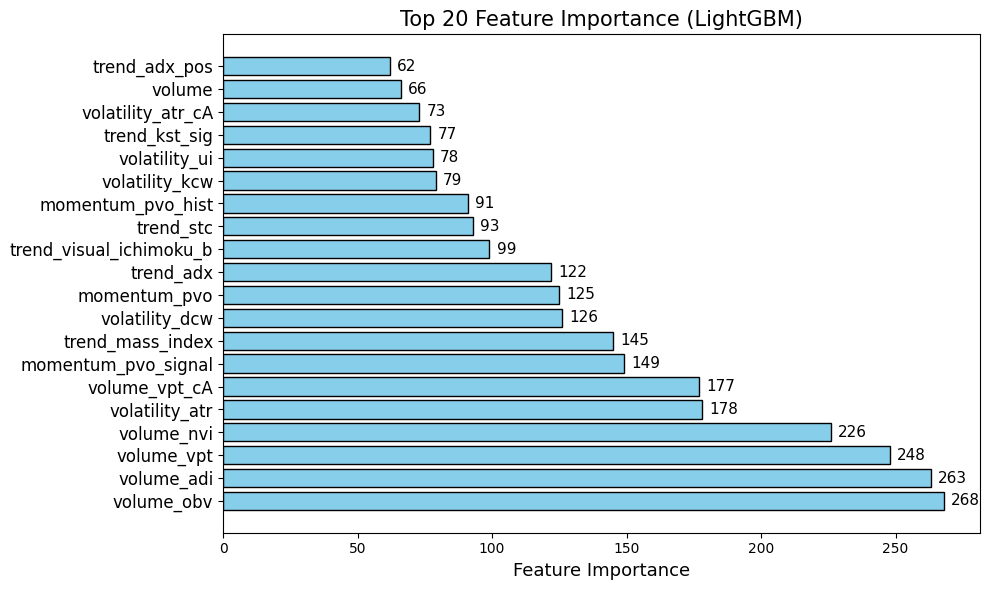

Top 20 feature ảnh hưởng nhất:
1. volume_obv: 268
2. volume_adi: 263
3. volume_vpt: 248
4. volume_nvi: 226
5. volatility_atr: 178
6. volume_vpt_cA: 177
7. momentum_pvo_signal: 149
8. trend_mass_index: 145
9. volatility_dcw: 126
10. momentum_pvo: 125
11. trend_adx: 122
12. trend_visual_ichimoku_b: 99
13. trend_stc: 93
14. momentum_pvo_hist: 91
15. volatility_kcw: 79
16. volatility_ui: 78
17. trend_kst_sig: 77
18. volatility_atr_cA: 73
19. volume: 66
20. trend_adx_pos: 62


In [9]:
# ------------------------------------------------------------------------------
# BƯỚC 4: Huấn luyện final model với best_params
# ------------------------------------------------------------------------------
print("\nHuấn luyện final model với bộ tham số tốt nhất...")

# best_params = study.best_params
best_params = {'n_estimators': 909, 'learning_rate': 0.2570845293090703, 'num_leaves': 70, 'max_depth': 6, 'subsample': 0.9024076020857527, 'colsample_bytree': 0.9699804693180353, 'reg_alpha': 1.5859996341512163e-08, 'reg_lambda': 9.312851419938153e-08, 'min_child_samples': 92}

best_params.update({
    'objective': 'multiclass',
    'num_class': 3,
    'random_state': 42,
    'n_jobs': -1,
})

def f1_eval_sklearn(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    y_pred_labels = y_pred.reshape(-1, n_classes).argmax(axis=1)
    return 'macro_f1', f1_score(y_true, y_pred_labels, average='macro'), True

final_clf = lgb.LGBMClassifier(**best_params)

# Huấn luyện với API Scikit-Learn, truyền sample_weight và hàm eval vào .fit()
final_clf.fit(
    X_train, y_train,
    sample_weight=sample_weight_array,
    eval_set=[(X_val, y_val)],
    eval_metric=f1_eval_sklearn,
    callbacks=[lgb.early_stopping(100, verbose=True)]
)


importances = final_clf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]

# Lấy top N feature quan trọng nhất
N = 20
indices = np.argsort(importances)[::-1][:N]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(N), top_importances[::-1], color='skyblue', edgecolor='k')
plt.yticks(range(N), [top_features[i] for i in range(N-1, -1, -1)], fontsize=12)
plt.xlabel("Feature Importance", fontsize=13)
plt.title(f"Top {N} Feature Importance (LightGBM)", fontsize=15)
plt.gca().invert_yaxis()
for i, v in enumerate(top_importances[::-1]):
    plt.text(v + max(top_importances)*0.01, i, f"{v}", va='center', fontsize=11)
plt.tight_layout()
plt.show()

print(f"Top {N} feature ảnh hưởng nhất:")
for i in range(N):
    print(f"{i+1}. {top_features[i]}: {top_importances[i]}")

# Evaluations

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def calculate_daily_performance_metrics(strategy_returns, risk_free_rate=0.0):
    """
    Tính toán các chỉ số hiệu suất dựa trên chuỗi lợi nhuận HÀNG NGÀY.
    (Phiên bản đã cải tiến)
    """
    periods_per_year = 252
    
    # Tính lãi suất phi rủi ro hàng ngày
    daily_risk_free_rate = (1 + risk_free_rate)**(1/periods_per_year) - 1

    equity_curve = (1 + strategy_returns).cumprod()
    total_return = equity_curve.iloc[-1] - 1
    
    # Tính lợi nhuận hàng năm (Annualized Return)
    num_years = len(strategy_returns) / periods_per_year
    annualized_return = (1 + total_return)**(1 / num_years) - 1 if num_years > 0 else 0

    mean_return = strategy_returns.mean()
    std_return = strategy_returns.std()
    
    # Sử dụng risk_free_rate trong Sharpe Ratio
    sharpe_ratio = (mean_return - daily_risk_free_rate) / std_return * np.sqrt(periods_per_year) if std_return != 0 else 0

    running_max = equity_curve.cummax()
    drawdown = (equity_curve - running_max) / running_max
    max_drawdown = drawdown.min()

    downside_std = strategy_returns[strategy_returns < 0].std()
    # Sử dụng risk_free_rate trong Sortino Ratio
    sortino_ratio = (mean_return - daily_risk_free_rate) / downside_std * np.sqrt(periods_per_year) if downside_std != 0 else 0

    # Sử dụng lợi nhuận hàng năm (annualized_return) cho Calmar Ratio
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else 0
    
    metrics = {
        "Cumulative Return": f"{total_return:.2%}",
        "Annualized Return": f"{annualized_return:.2%}",
        "Annualized Sharpe Ratio": f"{sharpe_ratio:.2f}",
        "Max Drawdown": f"{max_drawdown:.2%}",
        "Sortino Ratio": f"{sortino_ratio:.2f}",
        "Calmar Ratio": f"{calmar_ratio:.2f}",
    }
    return metrics

def calculate_trade_based_metrics(backtest_df):
    """
    Phân tích hiệu suất dựa trên từng giao dịch hoàn chỉnh (vào lệnh -> thoát lệnh).
    (Tính năng mới)
    """
    positions = backtest_df['position']
    # Xác định các điểm thay đổi vị thế để nhóm các giao dịch
    trade_changes = positions.diff().ne(0)
    # Gán một ID duy nhất cho mỗi giao dịch
    trade_ids = trade_changes.cumsum()
    # Chỉ xét những lúc có vị thế (khác 0)
    trades_df = backtest_df[positions != 0]

    if trades_df.empty:
        return {
            "Number of Trades": 0, "Win Rate": "N/A", "Profit Factor": "N/A",
            "Avg Win / Trade": "N/A", "Avg Loss / Trade": "N/A", "Payoff Ratio": "N/A"
        }

    # Gom nhóm theo từng trade ID để tính lợi nhuận cho mỗi trade
    trade_log_returns = trades_df.groupby(trade_ids)['strategy_log_returns'].sum()
    trade_simple_returns = np.exp(trade_log_returns) - 1

    # Tính các chỉ số
    num_trades = len(trade_simple_returns)
    winning_trades = trade_simple_returns[trade_simple_returns > 0]
    losing_trades = trade_simple_returns[trade_simple_returns < 0]

    num_win = len(winning_trades)
    num_loss = len(losing_trades)
    win_rate = num_win / num_trades if num_trades > 0 else 0

    gross_profit = winning_trades.sum()
    gross_loss = abs(losing_trades.sum())
    profit_factor = gross_profit / gross_loss if gross_loss != 0 else np.inf

    avg_win = winning_trades.mean() if num_win > 0 else 0
    avg_loss = losing_trades.mean() if num_loss > 0 else 0
    payoff_ratio = abs(avg_win / avg_loss) if avg_loss != 0 else np.inf

    metrics = {
        "Number of Trades": f"{num_trades}",
        "Win Rate": f"{win_rate:.2%}",
        "Profit Factor": f"{profit_factor:.2f}",
        "Avg Win / Trade": f"{avg_win:.2%}",
        "Avg Loss / Trade": f"{avg_loss:.2%}",
        "Payoff Ratio": f"{payoff_ratio:.2f}",
    }
    return metrics

# =============================================================================
# HÀM ĐÁNH GIÁ TỔNG THỂ
# =============================================================================

def evaluate_trading_strategy(
    signals, 
    y_test, 
    test_df, 
    risk_free_rate=0.0,
    plot=True
):
    """
    Đánh giá chiến lược giao dịch một cách toàn diện.
    (Phiên bản đã cải tiến, tích hợp đầy đủ các bộ chỉ số và biểu đồ)
    """
    results_df = test_df.copy()
    results_df['signal'] = signals
    results_df['true_label'] = y_test

    print("\nPhân bổ tín hiệu dự báo (-1 = SELL, 0 = HOLD, 1 = BUY):")
    print(pd.Series(signals).value_counts(normalize=True).apply("{:.2%}".format))

    # BƯỚC 1: MÔ PHỎNG GIAO DỊCH (VECTORIZED BACKTEST)
    print("\nĐang chạy backtest...")
    backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
    print("Backtest hoàn tất.")

    # BƯỚC 2: TÍNH TOÁN CÁC BỘ CHỈ SỐ HIỆU SUẤT
    strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
    daily_metrics = calculate_daily_performance_metrics(strategy_returns_series, risk_free_rate)
    trade_metrics = calculate_trade_based_metrics(backtest_results)

    print("\n--- HIỆU SUẤT (DỰA TRÊN LỢI NHUẬN HÀNG NGÀY) ---")
    for name, value in daily_metrics.items():
        print(f"{name:<25} {value}")
        
    print("\n--- HIỆU SUẤT (DỰA TRÊN TỪNG GIAO DỊCH) ---")
    for name, value in trade_metrics.items():
        print(f"{name:<25} {value}")

    # BƯỚC 3: TRỰC QUAN HÓA KẾT QUẢ
    if plot:
        # 1. Biểu đồ Equity Curve
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(14, 7))
        plt.plot(backtest_results['cumulative_strategy_returns'], label='Strategy Equity Curve')
        plt.plot(backtest_results['cumulative_asset_returns'], label='Buy & Hold Equity Curve', linestyle='--')
        plt.title('So sánh Hiệu suất: Chiến lược vs. Mua và Giữ', fontsize=16)
        plt.xlabel('Thời gian')
        plt.ylabel('Lợi nhuận Tích lũy')
        plt.legend()
        plt.show()

        # 2. Biểu đồ Drawdown
        drawdown_series = (backtest_results['cumulative_strategy_returns'] / backtest_results['cumulative_strategy_returns'].cummax()) - 1
        plt.figure(figsize=(14, 7))
        plt.fill_between(drawdown_series.index, drawdown_series, 0, color='red', alpha=0.3)
        plt.title('Drawdown của Chiến lược theo Thời gian', fontsize=16)
        plt.xlabel('Thời gian')
        plt.ylabel('Drawdown')
        plt.show()

    # BƯỚC 4: PHÂN TÍCH HIỆU SUẤT PHÂN LOẠI CỦA MÔ HÌNH
    y_test_mapped = y_test.replace({2: -1}) # Ánh xạ lại nhãn 2 thành 1 để khớp với tín hiệu
    cm = confusion_matrix(y_test_mapped, signals, labels=[-1, 0, 1])
    target_names_mapped = ['SELL (-1)', 'HOLD (0)', 'BUY (1)']
    
    if plot:
        plt.figure(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=target_names_mapped, yticklabels=target_names_mapped)
        plt.title('Confusion Matrix (SELL/HOLD/BUY)', fontsize=16)
        plt.xlabel('Predicted Signal')
        plt.ylabel('Actual Label')
        plt.show()

    print("\n--- Báo cáo các chỉ số phân loại (Precision, Recall, F1-score) ---")
    # Sử dụng labels để đảm bảo báo cáo có đủ 3 lớp ngay cả khi 1 lớp không xuất hiện trong dự báo
    print(classification_report(y_test_mapped, signals, target_names=target_names_mapped, digits=3, labels=[-1, 0, 1]))

    all_metrics = {**daily_metrics, **trade_metrics}
    return {
        "signals": signals,
        "results_df": results_df,
        "backtest_results": backtest_results,
        "performance_metrics": all_metrics,
        "confusion_matrix": cm,
        "classification_report": classification_report(y_test_mapped, signals, target_names=target_names_mapped, digits=3, output_dict=True, labels=[-1, 0, 1])
    }

def plot_cum_return_threshold_grid(probabilities, test_df):
    buy_thresholds = np.linspace(0.1, 0.9, 20)
    sell_thresholds = np.linspace(0.1, 0.9, 20)
    Z = np.zeros((len(buy_thresholds), len(sell_thresholds)))

    # Vòng lặp tính toán (giữ nguyên)
    for i, buy_th in enumerate(buy_thresholds):
        for j, sell_th in enumerate(sell_thresholds):
            signals = np.array([
                1 if p[1] > buy_th
                else -1 if p[2] > sell_th
                else 0
                for p in probabilities
            ])

        results_df = test_df.copy()
        results_df['signal'] = signals
        backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
        strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
        metrics = calculate_daily_performance_metrics(strategy_returns_series)
        Z[i, j] = float(metrics["Cumulative Return"].strip('%')) / 100
            

    # Tìm cực đại & cực tiểu
    max_idx = np.unravel_index(np.argmax(Z), Z.shape)
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)
    max_val = Z[max_idx]
    min_val = Z[min_idx]

    max_buy = buy_thresholds[max_idx[0]]
    max_sell = sell_thresholds[max_idx[1]]
    min_buy = buy_thresholds[min_idx[0]]
    min_sell = sell_thresholds[min_idx[1]]

    X, Y = np.meshgrid(sell_thresholds, buy_thresholds)

    # --- Vẽ 3D surface với chú thích tọa độ ---
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # Giảm alpha để dễ nhìn text hơn

    # --- ĐÁNH DẤU CỰC ĐẠI VÀ IN TỌA ĐỘ ---
    # Chú thích được cập nhật để bao gồm tọa độ (buy, sell)
    max_label = (f'Max: {max_val:.2%}\n'
                 f'Buy Th: {max_buy:.2f}\n'
                 f'Sell Th: {max_sell:.2f}')
    ax.scatter(max_sell, max_buy, max_val, color='red', s=50, label=max_label)
    ax.text(max_sell, max_buy, max_val * 1.05, f'Max\n({max_val:.2%})', color='red', fontsize=10, ha='center')

    # --- ĐÁNH DẤU CỰC TIỂU VÀ IN TỌA ĐỘ ---
    # Chú thích được cập nhật để bao gồm tọa độ (buy, sell)
    min_label = (f'Min: {min_val:.2%}\n'
                 f'Buy Th: {min_buy:.2f}\n'
                 f'Sell Th: {min_sell:.2f}')
    ax.scatter(min_sell, min_buy, min_val, color='blue', s=50, label=min_label)
    ax.text(min_sell, min_buy, min_val * 0.95, f'Min\n({min_val:.2%})', color='blue', fontsize=10, ha='center')

    ax.set_xlabel('Sell Threshold')
    ax.set_ylabel('Buy Threshold')
    ax.set_zlabel('Cumulative Return')
    ax.set_title('Cumulative Return theo Buy/Sell Threshold')
    
    # Hiển thị chú thích (legend) với thông tin tọa độ
    ax.legend(title="Điểm cực trị", loc='upper left', bbox_to_anchor=(0.0, 0.95))
    
    fig.colorbar(surf, shrink=0.5, aspect=5, label='Cumulative Return')
    plt.show()

In [ ]:
def run_full_evaluation(signals, X_test, y_test, test_df, tbm_params):
    """Hàm đánh giá đầy đủ (giữ nguyên, chỉ thay đổi cách gọi bên trong)."""
    print("--- Bắt đầu quy trình đánh giá trên dữ liệu thật ---")
    print("1. Nhận tín hiệu từ mô hình...")
    signals = pd.Series(signals, index=X_test.index)
    
    print("2. Tạo DataFrame Rào cản cho backtest...")
    price_series = test_df['close']
    # Gọi hàm MỚI để tạo rào cản
    
    print("3. Chạy backtest dựa trên sự kiện...")
    strategy_returns, trade_metrics = run_event_driven_backtest(price_series, signals, test_df)
    
    # ... (Phần báo cáo và vẽ biểu đồ giữ nguyên) ...
    print("\n--- KẾT QUẢ HIỆU SUẤT GIAO DỊCH ---")
    equity_curve = (1 + strategy_returns).cumprod()
    total_return = equity_curve.iloc[-1] - 1
    sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252) if strategy_returns.std() != 0 else 0
    print(f"{'Cumulative Return':<25} {total_return:.2%}")
    print(f"{'Annualized Sharpe Ratio':<25} {sharpe_ratio:.2f}")
    for name, value in trade_metrics.items():
        print(f"{name:<25} {value}")
        
    print("\n--- KẾT QUẢ PHÂN LOẠI CỦA MÔ HÌNH ---")
    print(classification_report(y_test, signals, labels=[0, 1, 2], target_names=['HOLD', 'BUY', 'SELL']))



In [ ]:
buy_thresholds = 0.1
sell_thresholds = 0.8

signals = np.array([
    1 if p[1] > buy_thresholds
    else -1 if p[2] > sell_thresholds
    else 0
    for p in probabilities
])

result = evaluate_trading_strategy(signals, y_test, test_df, plot=True)

In [126]:
# 4. GỌI HÀM ĐÁNH GIÁ
# Hàm này bây giờ sẽ tự động tạo ra các rào cản cần thiết cho backtest bên trong nó
run_full_evaluation(
    signals=signals,
    X_test=X_test,
    y_test=y_test,
    test_df=test_df, # DataFrame test chứa 'high', 'low', 'close'
    tbm_params=TBM_PARAMS
)

--- Bắt đầu quy trình đánh giá trên dữ liệu thật ---
1. Nhận tín hiệu từ mô hình...
2. Tạo DataFrame Rào cản cho backtest...
3. Chạy backtest dựa trên sự kiện...

--- KẾT QUẢ HIỆU SUẤT GIAO DỊCH ---
Cumulative Return         400.14%
Annualized Sharpe Ratio   0.18
Number of Trades          7349
Win Rate                  43.12%
Profit Factor             1.04

--- KẾT QUẢ PHÂN LOẠI CỦA MÔ HÌNH ---
              precision    recall  f1-score   support

        HOLD       1.00      0.00      0.00     76245
         BUY       0.25      1.00      0.40     54010
        SELL       0.00      0.00      0.00     84741

    accuracy                           0.25    214996
   macro avg       0.42      0.33      0.13    214996
weighted avg       0.42      0.25      0.10    214996



# Results Analysis

In [ ]:
# model_info = str(final_clf)
# total_features = len(X_train.columns)

# importances = final_clf.feature_importances_
# feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]
# # Lấy top N feature quan trọng nhất
# N = 20
# indices = np.argsort(importances)[::-1][:N]
# top_features = [feature_names[i] for i in indices]
# top_importances = importances[indices]

# top_feature_info = [(top_features[i], top_importances[i]) for i in range(N)]
# top_feature_info = "\n".join([f"{i+1}. {feature}: {importance:.4f}" for i, (feature, importance) in enumerate(top_feature_info)])

# classification_report_info = result["classification_report"]


In [ ]:
# import google.generativeai as genai
# import os
# from IPython.display import Markdown, display

# genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
# client = genai.GenerativeModel(model_name="gemini-2.5-flash")
# prompt = '''
# Tôi đang xây dựng một hệ thống dự báo giao dịch tài chính với các thông tin sau:

# ---

# ### 1. Thông tin model:
# - {model_info}
# - Số lượng feature: {total_features}
# ---

# ### 2. Thông tin triple barrier method:
# - Phương pháp dán nhãn: Triple barrier method với ATR động.
# - Profit take factor: {PROFIT_TAKE_FACTOR}
# - Stop loss factor: {STOP_LOSS_FACTOR}
# - Time limit: {TIME_LIMIT}
# - ATR period: {ATR_PERIOD}
# - Ý nghĩa: Dán nhãn BUY/SELL/HOLD dựa trên việc giá chạm ngưỡng lợi nhuận hoặc cắt lỗ (tính theo ATR) trong một khoảng thời gian xác định.

# ---

# ### 3. Top feature ảnh hưởng (feature importance):
# {top_feature_info}

# ---

# ### 4. Classification report trên tập test:
# {classification_report_info}
# ---

# ### 5. Các ngưỡng tín hiệu giao dịch:
# - buy_threshold = {buy_threshold}
# - sell_threshold = {sell_threshold}

# ---

# ### 6. Các chỉ số hiệu suất:
# {performance_metrics}

# ---

# Yêu cầu:
# - Đưa ra nhận xét về hiệu quả mô hình, các điểm mạnh/yếu, và gợi ý cải thiện nếu có.
# - Đề xuất các chiến lược giao dịch phù hợp dựa trên kết quả dự báo và các feature quan trọng.
# '''

# prompt = prompt.format(
#     model_info=model_info,
#     total_features=total_features,
#     PROFIT_TAKE_FACTOR=PROFIT_TAKE_FACTOR,
#     STOP_LOSS_FACTOR=STOP_LOSS_FACTOR,
#     top_feature_info=top_feature_info,
#     classification_report_info=classification_report_info,
#     TIME_LIMIT=TIME_LIMIT,
#     ATR_PERIOD=ATR_PERIOD,
#     buy_threshold=buy_threshold,
#     sell_threshold=sell_threshold,
#     performance_metrics=performance_metrics
# )


# response = client.generate_content(
#     prompt
# ).text

# display(Markdown(f"### 📊 Phân tích hiệu suất:\n\n{response}"))

## Data Preparation for Model

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# ------------------------------------------------------------------------------
# ĐỊNH NGHĨA FEATURES VÀ LABELS BAN ĐẦU
# ------------------------------------------------------------------------------
features = [col for col in train_df.columns if col not in ['triple barrier label', 'label_encoded', 'date', 'label']]
X_train_df = train_df[features]
y_train = train_df['triple barrier label']
X_val_df = val_df[features]
y_val = val_df['triple barrier label']
X_test_df = test_df[features]
y_test = test_df['triple barrier label']


# ------------------------------------------------------------------------------
# BƯỚC 1: TẠO CUSTOM DATASET VỚI LOGIC CHUẨN HÓA TIME-SERIES
# ------------------------------------------------------------------------------
print("BƯỚC 1: Định nghĩa Custom Dataset Class với logic chuẩn hóa Time-Series...")

class FinancialSequenceDataset(Dataset):
    def __init__(self, X_data, y_data, time_steps=60):
        """
        Hàm khởi tạo cho Dataset.
        Lưu ý: X_data ở đây là DataFrame Pandas thô, chưa được chuẩn hóa.
        """
        self.X_data = X_data.to_numpy() # Chuyển sang NumPy để xử lý
        self.y_data = y_data.to_numpy() if isinstance(y_data, pd.Series) else y_data
        self.time_steps = time_steps
        self.length = len(self.X_data) - self.time_steps

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        """
        Hàm này được DataLoader gọi để lấy ra một mẫu tại vị trí `idx`.
        Toàn bộ logic chuẩn hóa "vector" nằm ở đây.
        """
        start_idx = idx
        end_idx = idx + self.time_steps
        
        # Lấy ra chuỗi feature và label tương ứng từ dữ liệu thô
        sequence_raw = self.X_data[start_idx:end_idx]
        label = self.y_data[end_idx]
        
        # **LOGIC CHUẨN HÓA TIME-SERIES (VECTOR NORMALIZATION)**
        # Mỗi chuỗi sẽ được chuẩn hóa dựa trên giá trị tại bước thời gian đầu tiên (t=0) của chính nó.
        # Điều này giúp mô hình tập trung vào sự thay đổi % tương đối trong chuỗi.
        sequence_start_vector = sequence_raw[0, :]
        
        # Thêm một hằng số nhỏ (epsilon) để tránh lỗi chia cho 0
        epsilon = 1e-8
        
        # Chuẩn hóa bằng cách tính phần trăm thay đổi so với điểm bắt đầu
        normalized_sequence = (sequence_raw / (sequence_start_vector + epsilon)) - 1
        
        # Xử lý các giá trị NaN hoặc inf có thể phát sinh nếu epsilon không đủ
        normalized_sequence = np.nan_to_num(normalized_sequence, nan=0.0, posinf=0.0, neginf=0.0)

        # Chuyển đổi sang PyTorch Tensors
        sequence_tensor = torch.from_numpy(normalized_sequence).float()
        label_tensor = torch.tensor(label).long()
        
        return sequence_tensor, label_tensor

# ----- THAM SỐ QUAN TRỌNG -----
TIME_STEPS = 48 # 4 hours 
# -----------------------------

# ------------------------------------------------------------------------------
# BƯỚC 2: KHỞI TẠO CÁC ĐỐI TƯỢNG DATASET
# ------------------------------------------------------------------------------
print("BƯỚC 2: Khởi tạo các đối tượng Dataset từ Custom Class...")
# Chú ý: Chúng ta truyền trực tiếp DataFrame thô (chưa scale) vào Dataset.
# Toàn bộ logic scaling giờ đã được đóng gói bên trong class.

train_dataset = FinancialSequenceDataset(X_train_df, y_train, time_steps=TIME_STEPS)
val_dataset = FinancialSequenceDataset(X_val_df, y_val, time_steps=TIME_STEPS)
test_dataset = FinancialSequenceDataset(X_test_df, y_test, time_steps=TIME_STEPS)

print("Đã khởi tạo xong các Dataset.")
print(f"Số lượng mẫu trong train_dataset: {len(train_dataset)}")
print(f"Số lượng mẫu trong val_dataset: {len(val_dataset)}")
print(f"Số lượng mẫu trong test_dataset: {len(test_dataset)}")
print("-" * 30)


# ------------------------------------------------------------------------------
# BƯỚC 3: TẠO DATALOADER
# ------------------------------------------------------------------------------
print("BƯỚC 3: Đang tạo PyTorch DataLoader...")
BATCH_SIZE = 64
NUM_WORKERS = min(os.cpu_count(), 4) # Dùng tối đa 4 workers để tránh quá tải
print(f"Sử dụng {NUM_WORKERS} workers cho DataLoader.")

train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=BATCH_SIZE * 2, # Dùng batch size lớn hơn khi đánh giá
    shuffle=False, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE * 2, 
    shuffle=False, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)

BƯỚC 1: Định nghĩa Custom Dataset Class với logic chuẩn hóa Time-Series...
BƯỚC 2: Khởi tạo các đối tượng Dataset từ Custom Class...
Đã khởi tạo xong các Dataset.
Số lượng mẫu trong train_dataset: 755643
Số lượng mẫu trong val_dataset: 70168
Số lượng mẫu trong test_dataset: 214948
------------------------------
BƯỚC 3: Đang tạo PyTorch DataLoader...
Sử dụng 4 workers cho DataLoader.


# Transformer for Time Series Classification

In [33]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout):
        super().__init__()
        self.linear_1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(d_ff, d_model)
        self.gelu = nn.GELU()

    def forward(self, x):
        x = self.dropout(self.gelu(self.linear_1(x)))
        x = self.linear_2(x)
        return x

class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super().__init__()
        self.attn_norm = nn.LayerNorm(d_model)
        self.ff_norm = nn.LayerNorm(d_model)
        self.attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.ff = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        residual = x
        x = self.attn_norm(x)
        attn_output, _ = self.attn(x, x, x)
        x = residual + self.dropout(attn_output)
        residual = x
        x = self.ff_norm(x)
        ff_output = self.ff(x)
        x = residual + self.dropout(ff_output)
        return x

class TimeSeriesTransformer(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, n_classes, dropout=0.1):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.input_norm = nn.LayerNorm(d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        self.dropout = nn.Dropout(dropout)
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(d_model, n_heads, d_model * 4, dropout)
            for _ in range(n_layers)
        ])
        self.output_norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, n_classes)
        self.init_weights()

    def init_weights(self):
        for name, param in self.named_parameters():
            if param.dim() > 1:
                nn.init.xavier_uniform_(param)

    def forward(self, src):
        src = self.input_projection(src)
        src = self.input_norm(src)
        src = self.pos_encoder(src)
        src = self.dropout(src)
        for block in self.encoder_blocks:
            src = block(src)
        pooled_output = src.mean(dim=1)
        pooled_output = self.output_norm(pooled_output)
        output = self.output_layer(pooled_output)
        return output

In [53]:
from tqdm import tqdm
import gc
import torch.nn as nn

torch.backends.cudnn.benchmark = True


gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Khởi tạo model
N_FEATURES = X_train_df.shape[1] # Số lượng feature
D_MODEL = 128    # Kích thước vector của model
N_HEADS = 8      # Số lượng attention heads
N_LAYERS = 4     # Số lớp encoder
N_CLASSES = 3    # Số lớp đầu ra
DROPOUT = 0.2

model = TimeSeriesTransformer(N_FEATURES, D_MODEL, N_HEADS, N_LAYERS, N_CLASSES, DROPOUT).to(device)
print("Number of trainable parameters: ", sum(p.numel() for p in model.parameters() if p.requires_grad))
model = torch.compile(model)

if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = nn.DataParallel(model)
else:
    print(f"Using device: {device}")

criterion = nn.CrossEntropyLoss()

BASE_LR = 1e-6 # Bắt đầu với LR rất thấp
WARMUP_EPOCHS = 10 # Tăng thời gian warmup
GAMMA = 0.95
N_EPOCHS = 30
ACCUMULATION_STEPS = 4 # CẬP NHẬT: Thêm Gradient Accumulation

optimizer = torch.optim.AdamW(model.parameters(), lr=BASE_LR, weight_decay=0.01)

def lr_lambda(current_epoch):
    if current_epoch < WARMUP_EPOCHS:
        return float(current_epoch + 1) / float(WARMUP_EPOCHS)
    return GAMMA ** (current_epoch - WARMUP_EPOCHS)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

use_amp = torch.cuda.is_available()
scaler = torch.amp.GradScaler('cuda', enabled=use_amp)

if torch.cuda.is_available() and torch.cuda.is_bf16_supported():
    autocast_dtype = torch.bfloat16
    print("GPU hỗ trợ bfloat16. Sử dụng bfloat16 cho AMP.")
else:
    autocast_dtype = torch.float16
    print("GPU không hỗ trợ bfloat16. Sử dụng float16 cho AMP (nếu có lỗi, AMP sẽ bị tắt).")

# ------------------------------------------------------------------------------
# PHẦN 4: VÒNG LẶP HUẤN LUYỆN ĐẦY ĐỦ
# ------------------------------------------------------------------------------

def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, accumulation_steps):
    model.train() 
    total_loss = 0.0
    optimizer.zero_grad(set_to_none=True)
    
    for i, (data, targets) in enumerate(tqdm(dataloader, desc="Training")):
        data, targets = data.to(device), targets.to(device)
        
        with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=use_amp):
            outputs = model(data) 
            loss = criterion(outputs, targets) / accumulation_steps
        
        if torch.isnan(loss):
            print(f"Lỗi: Loss is NaN ở batch {i}. Dừng huấn luyện.")
            return float('nan')
            
        scaler.scale(loss).backward()
        
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(dataloader):
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
        
        total_loss += loss.item() * accumulation_steps
        
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion, device, use_amp, autocast_dtype):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for data, targets in tqdm(dataloader, desc="Evaluating"):
            data, targets = data.to(device), targets.to(device)
            with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=use_amp):
                outputs = model(data)
                loss = criterion(outputs, targets)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_predictions += (predicted == targets).sum().item()
            
    accuracy = correct_predictions / total_samples
    return total_loss / len(dataloader), accuracy

# Hàm huấn luyện chính
def run_training():
    torch.autograd.set_detect_anomaly(True) # Bật chế độ gỡ lỗi
    
    use_amp = torch.cuda.is_available()
    scaler = torch.amp.GradScaler('cuda', enabled=use_amp)
    
    for epoch in range(1, N_EPOCHS + 1):
        print(f"\n----- Epoch {epoch}/{N_EPOCHS} -----")
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, ACCUMULATION_STEPS)
        
        if np.isnan(train_loss):
            print("\nLỗi nghiêm trọng: Huấn luyện bị dừng. Thử tắt AMP.")
            # CẬP NHẬT: Nếu vẫn lỗi, thử chạy ở float32
            use_amp = False 
            scaler = torch.amp.GradScaler('cuda', enabled=use_amp)
            print("--- CHẠY LẠI EPOCH 1 Ở CHẾ ĐỘ FLOAT32 ĐỂ ĐẢM BẢO ỔN ĐỊNH ---")
            train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, ACCUMULATION_STEPS)
            if np.isnan(train_loss):
                 print("Lỗi vẫn xảy ra ngay cả ở float32. Vấn đề có thể nằm ở dữ liệu.")
                 break

        val_loss, val_accuracy = evaluate(model, val_loader, criterion, device, use_amp, autocast_dtype)
        
        print(f'Epoch: {epoch:02}')
        print(f'\tTrain Loss: {train_loss:.4f}')
        print(f'\t Val. Loss: {val_loss:.4f} |  Val. Accuracy: {val_accuracy:.4f}')
    
    # Đánh giá cuối cùng trên tập test
    print("\n--- ĐÁNH GIÁ CUỐI CÙNG TRÊN TẬP TEST ---")
    test_loss, test_accuracy = evaluate(model, test_loader, criterion, device, use_amp, autocast_dtype)
    print(f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}')


Number of trainable parameters:  807043
Using device: cuda
GPU hỗ trợ bfloat16. Sử dụng bfloat16 cho AMP.


In [ ]:
# Bắt đầu
run_training()

In [54]:
# Sửa lỗi load state_dict khi dùng torch.compile/OptimizedModule
state_dict = torch.load('best_transformer_model.pth')
try:
    model.load_state_dict(state_dict, strict=True)
except RuntimeError as e:
    print("Warning: strict loading failed, trying to remove _orig_mod prefix if present...")
    # Xử lý trường hợp OptimizedModule thêm _orig_mod vào tên tham số
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if k.startswith("_orig_mod."):
            new_state_dict[k[len("_orig_mod."):]] = v
        else:
            new_state_dict[k] = v
    model.load_state_dict(new_state_dict, strict=False)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully.


In [65]:
all_probs = []
all_labels = []

for X_batch, y_batch in test_loader:
    X_batch = X_batch.to(device)
    with torch.no_grad():
        logits = model(X_batch)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    all_probs.append(probs)
    all_labels.append(y_batch.cpu().numpy())
# Ghép lại toàn bộ xác suất và nhãn
probabilities = np.concatenate(all_probs, axis=0)

In [ ]:
plot_cum_return_threshold_grid(probabilities, test_df)


Phân bổ tín hiệu (-1 = SELL, 0 = HOLD, 1 = BUY):
 1    0.969662
 0    0.029077
-1    0.001261
Name: proportion, dtype: float64

Đang chạy backtest...
Backtest hoàn tất.

--- CÁC CHỈ SỐ HIỆU SUẤT GIAO DỊCH ---
Cumulative Return         49.13%
Annualized Sharpe Ratio   0.06
Max Drawdown              -21.41%
Sortino Ratio             0.08
Calmar Ratio              2.30
Win Rate                  49.96%
Profit Factor             1.01
Payoff Ratio              1.00
Expectancy                -0.00000
Avg Win                   0.00035
Avg Loss                  -0.00035
RR Ratio                  1.00
Number of Trades          213421


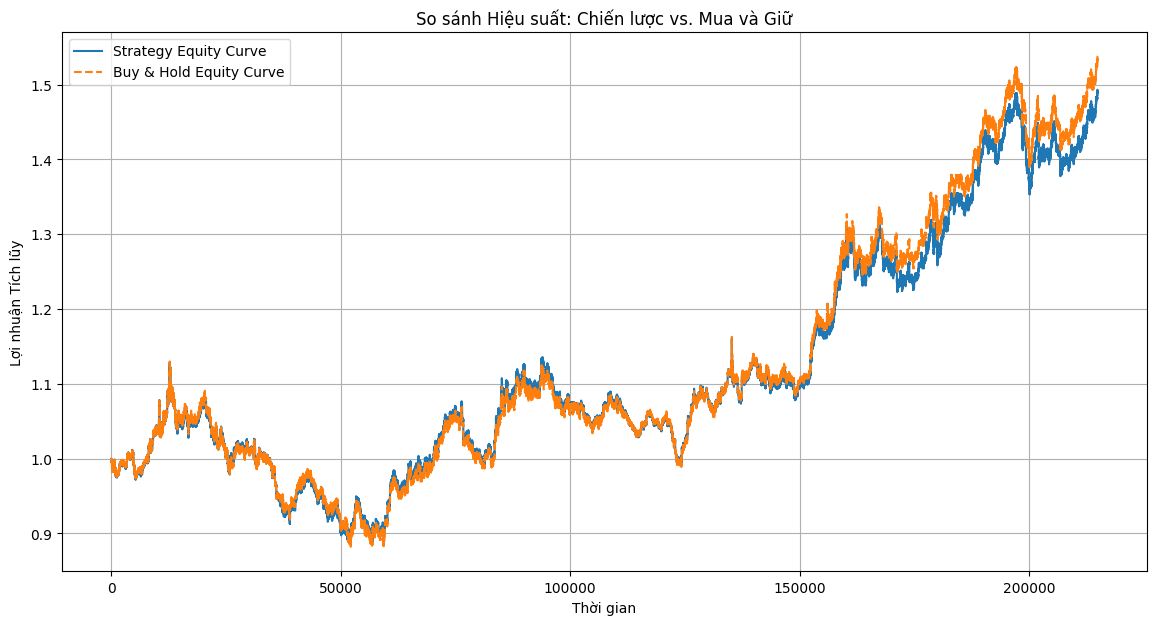

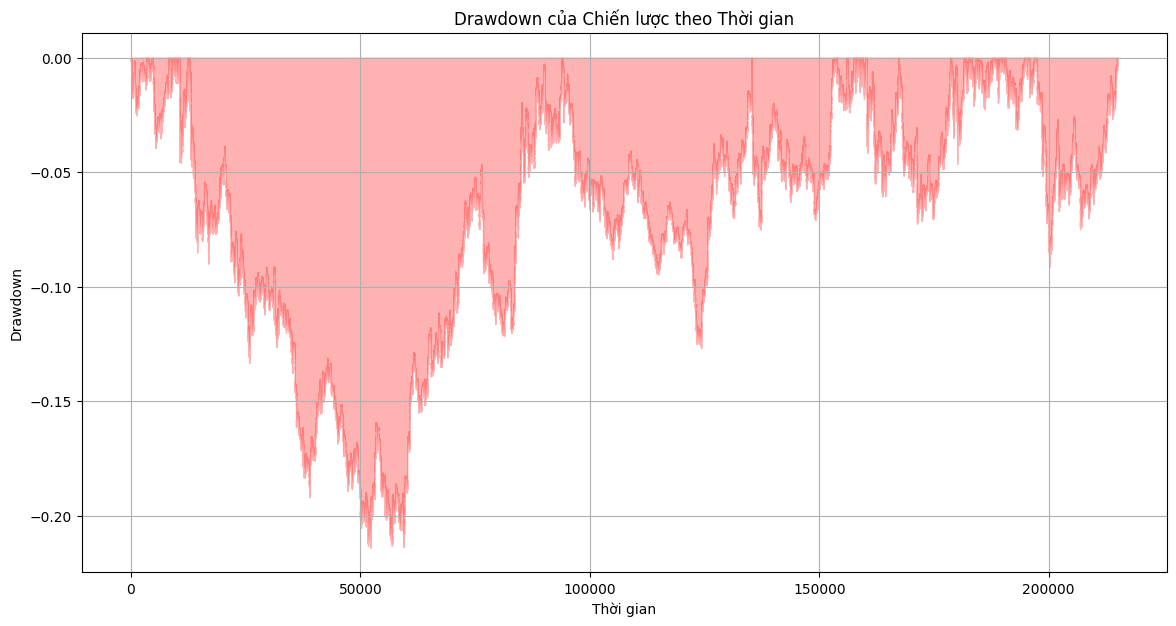

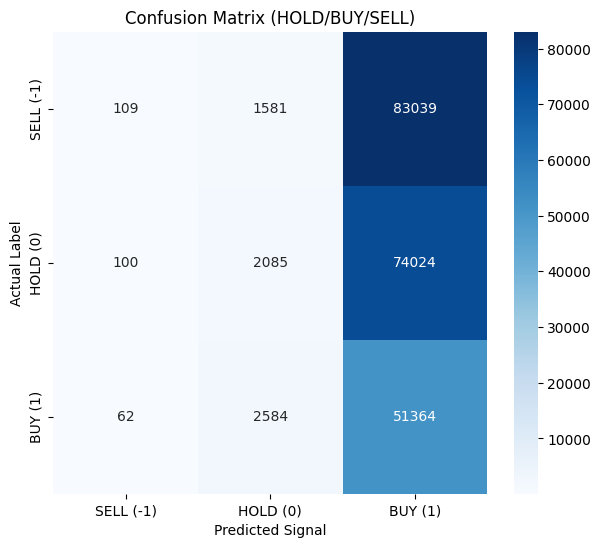


--- Báo cáo các chỉ số phân loại (Precision, Recall, F1-score) ---
              precision    recall  f1-score   support

   SELL (-1)      0.402     0.001     0.003     84729
    HOLD (0)      0.334     0.027     0.051     76209
     BUY (1)      0.246     0.951     0.391     54010

    accuracy                          0.249    214948
   macro avg      0.327     0.327     0.148    214948
weighted avg      0.339     0.249     0.117    214948



In [77]:
predicted_signals = np.array([
    1 if p[1] > 0.1 # BUY
    else -1 if p[2] > 0.9 # SELL
    else 0
    for p in probabilities
])

result = evaluate_trading_strategy(predicted_signals, y_test[:-48], test_df[:-48])


Phân bổ tín hiệu (-1 = SELL, 0 = HOLD, 1 = BUY):
-1    0.394184
 0    0.354546
 1    0.251270
Name: proportion, dtype: float64

Đang chạy backtest...
Backtest hoàn tất.

--- CÁC CHỈ SỐ HIỆU SUẤT GIAO DỊCH ---
Cumulative Return         1972216548535.10%
Annualized Sharpe Ratio   3.37
Max Drawdown              -1.25%
Sortino Ratio             5.86
Calmar Ratio              1578390038374.28
Win Rate                  58.56%
Profit Factor             1.94
Payoff Ratio              1.35
Expectancy                0.00011
Avg Win                   0.00039
Avg Loss                  -0.00029
RR Ratio                  1.35
Number of Trades          213408


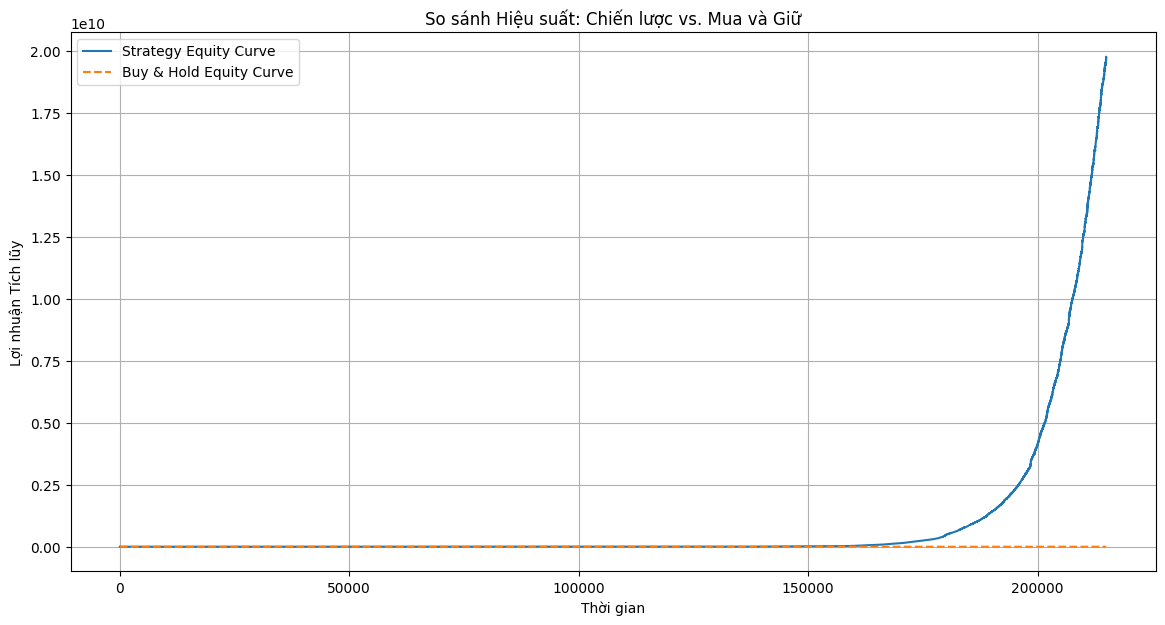

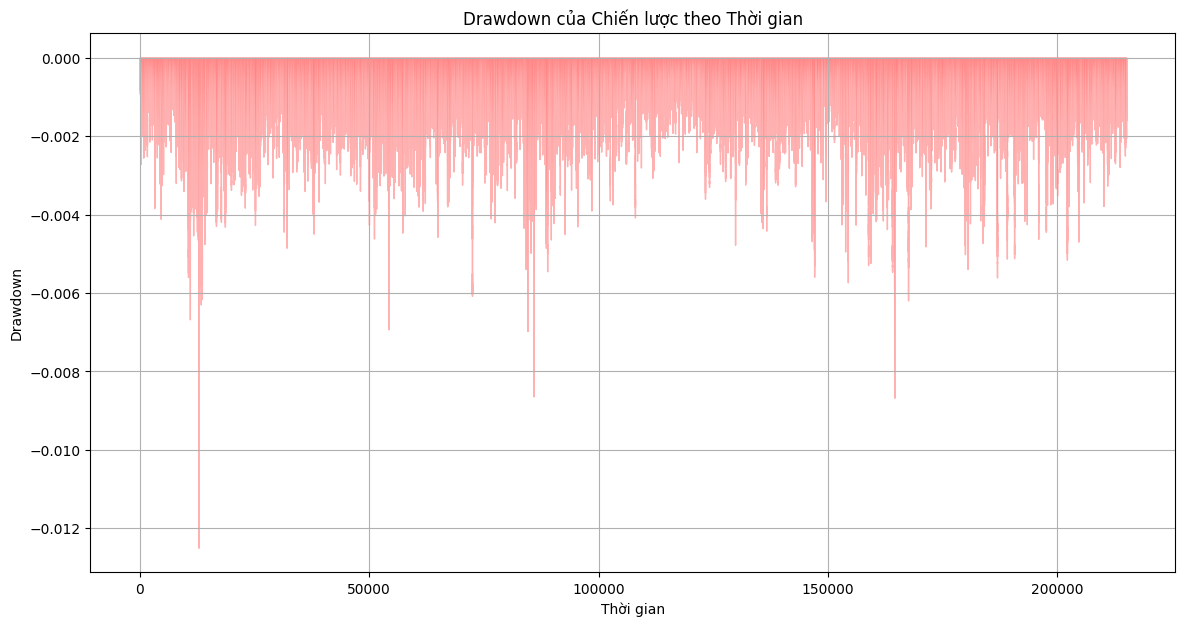

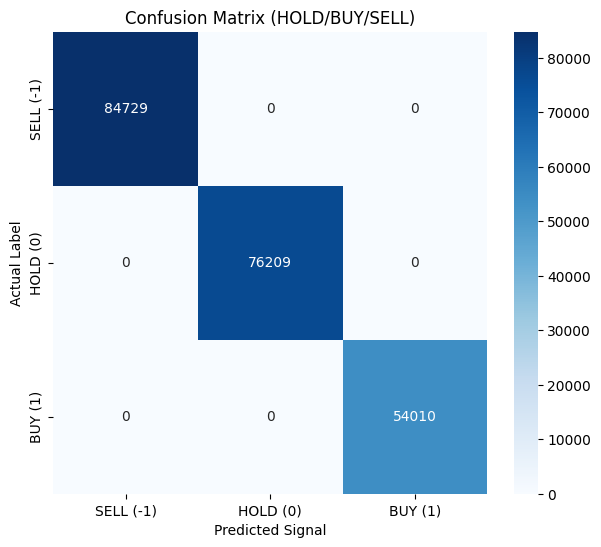


--- Báo cáo các chỉ số phân loại (Precision, Recall, F1-score) ---
              precision    recall  f1-score   support

   SELL (-1)      1.000     1.000     1.000     84729
    HOLD (0)      1.000     1.000     1.000     76209
     BUY (1)      1.000     1.000     1.000     54010

    accuracy                          1.000    214948
   macro avg      1.000     1.000     1.000    214948
weighted avg      1.000     1.000     1.000    214948



{'signals': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int32),
 'results_df':                        date     open     high      low    close  volume label  \
 0       2022-01-03 01:05:00  1830.63  1831.82  1829.52  1831.65     251  SELL   
 1       2022-01-03 01:10:00  1831.61  1831.61  1830.48  1830.51     162   BUY   
 2       2022-01-03 01:15:00  1830.48  1830.76  1829.98  1830.07     128  SELL   
 3       2022-01-03 01:20:00  1830.07  1830.08  1829.21  1829.32     112  SELL   
 4       2022-01-03 01:25:00  1829.35  1829.42  1828.99  1829.28     111  HOLD   
 ...                     ...      ...      ...      ...      ...     ...   ...   
 214943  2025-01-31 19:15:00  2805.86  2812.78  2803.46  2810.93     552   BUY   
 214944  2025-01-31 19:20:00  2811.08  2812.33  2808.36  2809.00     501   BUY   
 214945  2025-01-31 19:25:00  2809.20  2809.38  2806.31  2807.83     435  HOLD   
 214946  2025-01-31 19:30:00  2807.94  2809.91  2807.03  2808.74     477   BUY   
 214947  2025-01-31 1

In [76]:
true_signals = y_test[:-48].replace(2, -1).values.copy()
evaluate_trading_strategy(signals, y_test[:-48], test_df[:-48])